<a href="https://colab.research.google.com/github/bikash119/bikash119/blob/main/learnpytorch_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning pytorch torchvision module and building models for image datasets

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f'Pytorch version : {torch.__version__} \ntorchvision version : {torchvision.__version__}')

Pytorch version : 2.0.1+cu118 
torchvision version : 0.15.2+cu118


### Download the FashionMNIST dataset for training 

In [2]:
# set up the training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

#set up the test data

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15155634.86it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273449.92it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4988013.83it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21399679.87it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
#shape of the image
image.shape

torch.Size([1, 28, 28])

### Hence its a 1 channel( grayscale ) 28x28 image.
### The shape of image tensor is [color_channel=1, height=28, width=28]

### Pytorch recommends NHWC or [Number of images, Height, Width, channel]

In [5]:
len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

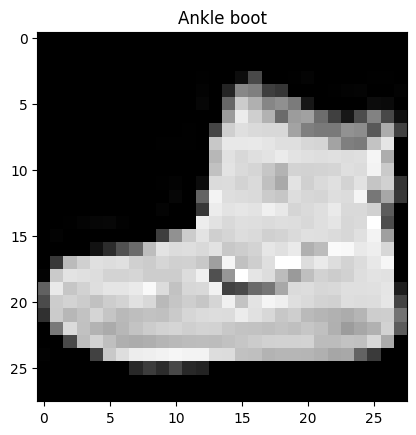

In [7]:
##  Visualize a sample image and its label
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label]);

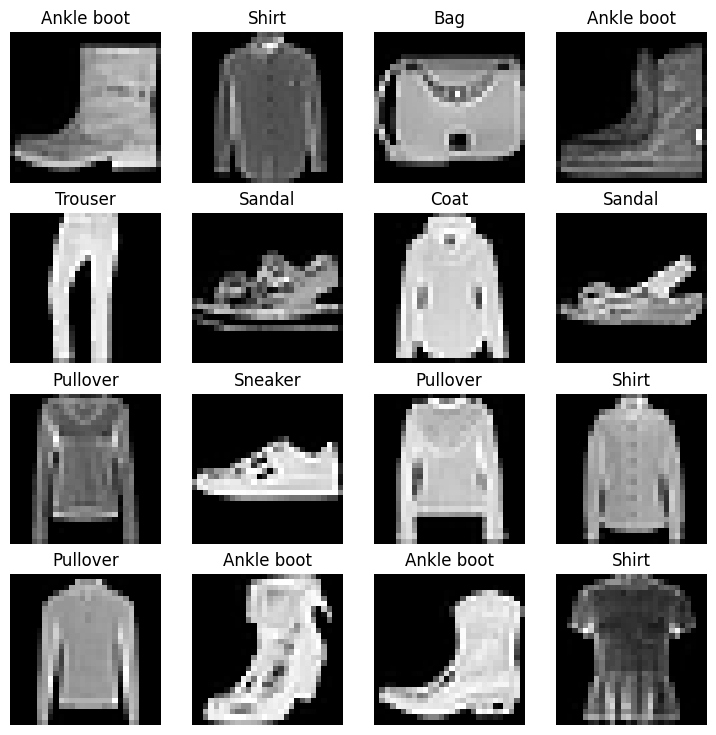

In [8]:
## plot a few more images from the dataset
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## Can we solve this with a linear model?

## Prepare Dataloader
## It loads the data to the model. Transforms the data to a python iterable of smaller chunks
## With mini-batches (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

In [9]:
## Let's create the dataloader for Training and Test dataset
from torch.utils.data import DataLoader

#Set the size of mini batch
BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f'DataLoaders : {train_dataloader} , {test_dataloader}')
print(f'Length of Train Data loader {len(train_dataloader)} with batch size {BATCH_SIZE}')
print(f'Length of Test Data loader {len(test_dataloader)} with batch size {BATCH_SIZE}')

DataLoaders : <torch.utils.data.dataloader.DataLoader object at 0x7f93d039f970> , <torch.utils.data.dataloader.DataLoader object at 0x7f93d039fd30>
Length of Train Data loader 1875 with batch size 32
Length of Test Data loader 313 with batch size 32


In [10]:
## Checkout what's inside training dataloader
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## Model_0 : The baseline model
## We will have 2 `nn.Linear` layer but before that we need to flatten the image tensor.
## Since we are using image data, we need to use `nn.Flatten`. It compresses the dimensions for tensor into a single vector.

### Let's see what `nn.Flatten` does

In [11]:
flatten_model = nn.Flatten()

print(f'Shape of image tensor before flatten : {image.shape} -> [color_channels, height, width]')
print(f'Shape of image tensor after flatten : {flatten_model(image).shape} -> [color_channels, height * width]')

Shape of image tensor before flatten : torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape of image tensor after flatten : torch.Size([1, 784]) -> [color_channels, height * width]


## Create the model

In [12]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x) -> torch.Tensor:
    return self.layer_stack(x)


In [13]:
model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [14]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
  print(f'helper_functions.py already exists, skipping download')
else:
  print(f'Download helper functions')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

Download helper functions


### Setup the loss and optimizer

In [15]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)
loss_fn,optimizer

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [16]:
## Function to track training time


from timeit import default_timer as timer

def print_training_time(start:float , end: float, device: torch.device=None):
  ''' Prints the difference between start time and end time

  Args: 
    start(float) : start time of computation ( Preferred in timeit format)
    end (float) : end time of computation ( preferred in timeit format)
    device (torch.device) : Device on which training is executed . Default is None

  Returns:
    float : time between start and end time in seconds. Higher is Longer
  '''
  total_time = end - start
  print(f'Train time on {device} is {total_time: .3f} seconds')
  return total_time

## Steps for Training


1. Loop through epochs
  2. Loop through training batches
    1. Perform training
    2. Calculate loss
    3. Calculate accuracy
  3. Loop through testing batches
    1. Perform Test
    2. Calcuate loss
    3. Calculate accuracy
  4. Print time taken



In [17]:
# import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3

## Create training and test loop

for epoch in tqdm(range(epochs)):
  print(f'Epoch : {epoch} \n ----------')
  ## Accumulate training loss for all batches
  train_loss = 0
  for batch,(X,y) in enumerate(train_dataloader):

    ## Train the model
    model_0.train()

    ## Forward pass
    y_preds = model_0(X)

    ## Calculate Loss
    loss = loss_fn(y_preds,y)
    train_loss += loss

    ## Zero grad
    optimizer.zero_grad()

    ## backprop
    loss.backward()

    ## Update parameters
    optimizer.step()

    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} images')
    
  train_loss /= len(train_dataloader)

  ###### Testing #########
  test_loss, test_acc=0, 0
  ## Evaluate model
  model_0.eval()

  with torch.inference_mode():
    for X,y in test_dataloader:
      test_preds = model_0(X)
      loss = loss_fn(test_preds,y)
      test_loss += loss
      test_acc += accuracy_fn(y_true=y, y_pred=test_preds.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_training_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
 ----------
Looked at 0/60000 images
Looked at 12800/60000 images
Looked at 25600/60000 images
Looked at 38400/60000 images
Looked at 51200/60000 images

Train loss: 0.58906 | Test loss: 0.50808, Test acc: 82.21%

Epoch : 1 
 ----------
Looked at 0/60000 images
Looked at 12800/60000 images
Looked at 25600/60000 images
Looked at 38400/60000 images
Looked at 51200/60000 images

Train loss: 0.47705 | Test loss: 0.48183, Test acc: 82.94%

Epoch : 2 
 ----------
Looked at 0/60000 images
Looked at 12800/60000 images
Looked at 25600/60000 images
Looked at 38400/60000 images
Looked at 51200/60000 images

Train loss: 0.45532 | Test loss: 0.47896, Test acc: 83.39%

Train time on cpu is  31.552 seconds


### Make predictions and get Model 0 results

In [18]:
torch.manual_seed(42)

def eval_mode(model: torch.nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  
  """ Returns a dictionary containing the results of model prediction on a dataloader

  Args:
    model (torch.nn.Module): A pytorch model capable of making predictions on data_loader
    dataloader (torch.utils.data.Dataloader): The target dataset to predict on.
    loss_fn (torch.nn.Module): A loss function of model.
    accuracy_fn: A function to compare model prediction to the truth labels.

  Returns:
    (dict): Results of model making predictions on dataloader
  """

  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in dataloader:
      X,y = X.to(device),y.to(device)
      y_pred = model(X)

      ## Accumulate the loss and accuracy per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    
    loss /= len(dataloader)
    acc /= len(dataloader)

  return {"model": model.__class__.__name__,
          "model_loss": loss.item(),
          "accuracy": acc} 

In [19]:
device = "cpu"
model_0_results = eval_mode(model=model_0,dataloader=test_dataloader,
                            loss_fn=loss_fn,accuracy_fn=accuracy_fn)

model_0_results

{'model': 'FashionMNISTModelV0',
 'model_loss': 0.47895535826683044,
 'accuracy': 83.38658146964856}

### Set up device agnostic code

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Build a better model by adding non-linearity

In [21]:
## Create the model with linear and non-linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_features,hidden_units,output_features):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features),
        nn.ReLU()
    )

  def forward(self,x) -> torch.Tensor:
    return self.layer_stack(x)


In [22]:
model_1 = FashionMNISTModelV1(input_features=784,
                              hidden_units = 10,
                              output_features =len(class_names)).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [23]:
next(model_1.parameters()).device

device(type='cuda', index=0)

#### Setup the loss function, optimizer and accuracy function

In [24]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(),lr=0.1)


### Functionizing the training and test steps
train_step: will take a model, a dataloader, loss_function ,optimizer

test_step: will take a model, a dataloader, loss function and evaluation function

In [25]:
def train_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch,(X,y) in enumerate(dataloader):

    X,y = X.to(device),y.to(device)

    ## forward pass
    y_pred = model(X)

    # calculate loss
    loss = loss_fn(y_pred,y)
    train_loss += loss

    ## calculate accuracy
    train_acc += accuracy_fn(y_true=y,y_pred = y_pred.argmax(dim=1))

    ## Zero grad
    optimizer.zero_grad()

    ## backprop
    loss.backward()

    ## update parameters
    optimizer.step()
  
  ## Calculate the train loss and train accuracy after each epoch
  train_loss /= len(dataloader)
  train_acc /=  len(dataloader)
  print(f'Train loss : {train_loss: .4f}, Train_acc: {train_acc: .2f}%')


def test_step(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn,
              device: torch.device=device):
  
  test_loss , test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X,y in dataloader:
    
      X, y = X.to(device), y.to(device)

      ## Forward pass
      test_pred = model(X)

      ## Calculate Loss
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
  
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

  print(f'Test loss: {test_loss: .4f}, Test acc: {test_acc: .2f}%')


## Lets train our non-linear model

In [26]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_1, 
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  
  test_step(model=model_1,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)
  
  train_time_end_on_gpu = timer()

  total_train_time_model_1_on_gpu = print_training_time(train_time_start_on_gpu,
                                                        train_time_end_on_gpu,
                                                        device)

  

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss :  0.9825, Train_acc:  65.06%
Test loss:  0.7606, Test acc:  72.80%
Train time on cuda is  14.812 seconds
Epoch: 1
---------
Train loss :  0.7037, Train_acc:  74.48%
Test loss:  0.7173, Test acc:  73.67%
Train time on cuda is  27.227 seconds
Epoch: 2
---------
Train loss :  0.6738, Train_acc:  75.31%
Test loss:  0.6917, Test acc:  74.81%
Train time on cuda is  38.654 seconds


### Evaluate the model

In [27]:
eval_mode(model=model_1,dataloader=test_dataloader,
          loss_fn=loss_fn,accuracy_fn=accuracy_fn)

{'model': 'FashionMNISTModelV1',
 'model_loss': 0.6917039752006531,
 'accuracy': 74.810303514377}

In [28]:
model_0_results

{'model': 'FashionMNISTModelV0',
 'model_loss': 0.47895535826683044,
 'accuracy': 83.38658146964856}

## Building the **Convolution Neural Network**
#### Structure of the neural nework
`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

In [29]:
import torch
from torch import nn

In [45]:
## Create the convolutional network
class FashionMNISTModelV3(nn.Module):
  def __init__(self,input_shape: int,hidden_units: int,output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        ###  Get to the root of why in_features size = hidden_units * 7 * 7
        nn.Linear(in_features = hidden_units * 7 * 7,
                  out_features = output_shape),
    )
  
  def forward(self,x) -> torch.Tensor:
    x= self.block_1(x)
    #print(f'Output Shape after passing through block 2 : {x.shape}')
    x= self.block_2(x)
    #print(f'Output Shape after passing through block 2 : {x.shape}')
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_3 = FashionMNISTModelV3(input_shape=1,
                              hidden_units=10, 
                              output_shape=len(class_names)).to(device)
model_3                                                            

  




FashionMNISTModelV3(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Toy data to learn the behaviour of `nn.Conv2d`

In [31]:
torch.manual_seed(42)
## Random numbers with same size as image batch
images = torch.rand(size=(32,3,64,64))
single_image = images[0]
print(f'Image batch shape = {images.shape} -> [batch_size,color_channel,height,width]')
print(f'Single image shape = {single_image.shape} -> [ color_channel, height,width]')
print(f"Single image pixel values:\n{single_image}")

Image batch shape = torch.Size([32, 3, 64, 64]) -> [batch_size,color_channel,height,width]
Single image shape = torch.Size([3, 64, 64]) -> [ color_channel, height,width]
Single image pixel values:
tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.

In [32]:
### Lets create a conv layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)
print(f'Single image shape = {single_image.shape} -> [ color_channel, height,width]')
print(f'Shape after Conv Layer= {conv_layer(single_image).shape} -> [ color_channel, height,width]')


Single image shape = torch.Size([3, 64, 64]) -> [ color_channel, height,width]
Shape after Conv Layer= torch.Size([10, 62, 62]) -> [ color_channel, height,width]


In [33]:
### Lets create a conv layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(5,5),
                       stride=2,
                       padding=0)
print(f'Single image shape = {single_image.shape} -> [ color_channel, height,width]')
print(f'Shape after Conv Layer= {conv_layer(single_image).shape} -> [ color_channel, height,width]')


Single image shape = torch.Size([3, 64, 64]) -> [ color_channel, height,width]
Shape after Conv Layer= torch.Size([10, 30, 30]) -> [ color_channel, height,width]


In [34]:
conv_layer.state_dict()

OrderedDict([('weight',
              tensor([[[[ 8.6644e-02,  7.4477e-02, -1.1213e-01, -5.8190e-02, -1.1435e-01],
                        [ 6.2393e-02,  6.2068e-02,  5.4915e-02, -3.2403e-02,  7.4179e-02],
                        [ 5.5348e-02, -3.0596e-02, -3.7606e-02,  6.9839e-03, -8.3805e-02],
                        [-8.1205e-02, -3.4864e-02,  2.7452e-02, -7.6423e-02,  3.9710e-02],
                        [ 5.3559e-02, -1.1397e-01,  1.1313e-02, -2.9998e-02,  5.2986e-03]],
              
                       [[-7.1268e-02,  4.0478e-02, -3.2422e-02, -1.0035e-01, -4.0299e-04],
                        [-4.2190e-02,  2.6095e-02, -7.2488e-02,  8.8034e-02,  6.6542e-02],
                        [ 1.0382e-01, -1.0599e-01,  8.8149e-02,  4.4779e-02, -1.4483e-02],
                        [-5.4108e-02, -3.4084e-02,  8.5285e-02, -3.6738e-02, -4.1795e-02],
                        [ 4.1912e-02,  3.0766e-02,  7.1335e-02,  9.9089e-02,  8.0400e-02]],
              
                       [[-1.2555e-

In [35]:
print(f'Shape of Weights= {conv_layer.weight.shape}' )
print(f'Shape of Bias= {conv_layer.bias.shape}')


Shape of Weights= torch.Size([10, 3, 5, 5])
Shape of Bias= torch.Size([10])


### Understand Effect of MaxPool2d

In [36]:
## Random image tensor
print(f' Shape of single image : {single_image.shape}')
print(f' Shape of unsquezzed single image: {single_image.unsqueeze(dim=0).shape}')
max_pool_layer = nn.MaxPool2d(kernel_size=2)
image_thru_conv_layer = conv_layer(single_image.unsqueeze(dim=0))
image_thru_conv_and_max_pool = max_pool_layer(image_thru_conv_layer)

print(f' Shape of single image after passing through conv layer: {image_thru_conv_layer.shape}')
print(f' Shape of single image after passing thr conv layer and max pool layer: {image_thru_conv_and_max_pool.shape}')


 Shape of single image : torch.Size([3, 64, 64])
 Shape of unsquezzed single image: torch.Size([1, 3, 64, 64])
 Shape of single image after passing through conv layer: torch.Size([1, 10, 30, 30])
 Shape of single image after passing thr conv layer and max pool layer: torch.Size([1, 10, 15, 15])


#### Small tensor max pool experiment

In [37]:
random_tensor = torch.randn(size=(1,1,2,2))
print(f' random tensor {random_tensor}')
print(f' Shape of random tensor {random_tensor.shape}')

random_tensor_thru_max_pool = max_pool_layer(random_tensor)

print(f'Shape of random tensor after passing through max pool : {random_tensor_thru_max_pool.shape}')
print(f'Random tensor content after passing through max pool : {random_tensor_thru_max_pool}')

 random tensor tensor([[[[-0.3200,  0.8697],
          [ 0.2385,  1.0487]]]])
 Shape of random tensor torch.Size([1, 1, 2, 2])
Shape of random tensor after passing through max pool : torch.Size([1, 1, 1, 1])
Random tensor content after passing through max pool : tensor([[[[1.0487]]]])


#### Small tensor avg pool experiment

In [38]:
random_tensor = torch.randn(size=(1,1,2,2))
print(f' random tensor {random_tensor}')
print(f' Shape of random tensor {random_tensor.shape}')

avg_pool_layer = nn.AvgPool2d(kernel_size=2)
random_tensor_thru_avg_pool = avg_pool_layer(random_tensor)

print(f'Shape of random tensor after passing through max pool : {random_tensor_thru_avg_pool.shape}')
print(f'Random tensor content after passing through max pool : {random_tensor_thru_avg_pool}')

 random tensor tensor([[[[ 0.6190,  1.1283],
          [-0.8875,  1.9835]]]])
 Shape of random tensor torch.Size([1, 1, 2, 2])
Shape of random tensor after passing through max pool : torch.Size([1, 1, 1, 1])
Random tensor content after passing through max pool : tensor([[[[0.7108]]]])


In [39]:
(0.3424+0.0397-1.1558-0.2820)/4

-0.26392499999999997

## Setting up the loss function and optimizer

In [40]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [41]:
model_3

FashionMNISTModelV3(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Train the CNN

In [46]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_3 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_3,
             dataloader=train_dataloader,
             loss_fn = loss_fn,
             optimizer= optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  
  test_step(model= model_3,
            dataloader= test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn= accuracy_fn,
            device= device)
  
  train_time_end_model_3 = timer()
  total_train_time_model_3 = print_training_time(start=train_time_start_model_3,
                                                 end=train_time_end_model_3,
                                                 device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss :  2.3023, Train_acc:  10.00%
Test loss:  2.3023, Test acc:  9.99%
Train time on cuda is  13.142 seconds
Epoch: 1
---------
Train loss :  2.3023, Train_acc:  10.00%
Test loss:  2.3023, Test acc:  9.99%
Train time on cuda is  27.406 seconds
Epoch: 2
---------
Train loss :  2.3023, Train_acc:  10.00%
Test loss:  2.3023, Test acc:  9.99%
Train time on cuda is  41.186 seconds
